In [32]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import os

In [33]:
current_dir = os.getcwd()

# current_dir = os.path.dirname(os.path.abspath(__file__))
csv_path = os.path.join(current_dir, "..", "Data", "holland_data.csv")
csv_path = os.path.abspath(csv_path)

In [34]:
data_raw=pd.read_csv(csv_path,delimiter='\t')
data_raw.info

C:\Users\usEr\AppData\Local\Temp\ipykernel_30180\485099286.py:1: DtypeWarning: Columns (93) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw=pd.read_csv(csv_path,delimiter='\t')


<bound method DataFrame.info of         R1  R2  R3  R4  R5  ...  uniqueNetworkLocation  country  source  \
0        3   4   3   1   1  ...                      1       US       2   
1        1   1   2   4   1  ...                      1       US       1   
2        2   1   1   1   1  ...                      1       US       1   
3        3   1   1   2   2  ...                      1       CN       0   
4        4   1   1   2   1  ...                      1       PH       0   
...     ..  ..  ..  ..  ..  ...                    ...      ...     ...   
145823   2   1   1   1   1  ...                      1       US       1   
145824   1   1   1   1   1  ...                      1       US       1   
145825   1   1   1   1   1  ...                      1       US       2   
145826   3   4   4   5   2  ...                      2       US       0   
145827   2   4   1   4   2  ...                      1       US       1   

                      major  Unnamed: 93  
0                       

In [35]:
data = data_raw.copy()
pd.options.display.max_columns = 150
data.drop(data.columns[48:], axis=1, inplace=True)
print('Number of participants: ', len(data))
data.head()

Number of participants:  145828


,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,I3,I4,I5,I6,I7,I8,A1,A2,A3,A4,A5,A6,A7,A8,S1,S2,S3,S4,S5,S6,S7,S8,E1,E2,E3,E4,E5,E6,E7,E8,C1,C2,C3,C4,C5,C6,C7,C8
0,3,4,3,1,1,4,1,3,5,5,4,3,4,5,4,3,5,4,1,2,4,5,2,4,3,5,5,4,5,5,5,5,2,1,4,1,2,2,1,3,1,3,1,1,1,3,1,1
1,1,1,2,4,1,2,2,1,5,5,5,4,4,4,4,4,2,1,4,2,1,3,4,2,2,3,4,3,4,2,3,1,1,1,1,1,1,1,1,3,1,1,2,1,1,2,1,1
2,2,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,1,1,1,2,1,1,3,1,3,1,5,3,5,5,4,4,1,3,3,5,1,4,4,3,1,3,2,2,1,2,4,1
3,3,1,1,2,2,2,2,2,4,1,2,4,3,2,3,2,5,2,4,5,1,4,4,2,4,2,3,3,2,1,3,2,5,4,3,2,3,3,2,3,3,2,3,3,2,2,2,2
4,4,1,1,2,1,1,1,2,5,5,5,3,5,5,5,3,3,5,5,5,5,5,1,5,5,4,4,4,5,5,5,5,2,3,2,3,2,4,2,2,4,2,2,4,5,5,2,2


In [36]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import joblib


df = data
columns = list(df.columns)

scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
# This (scaler ) is created just for sake of ease of calculation for clustering 
df = df.dropna(axis=0)
df_sample = df

In [37]:
root_dir = os.path.abspath(os.path.join(current_dir, "..","artifacts"))
joblib.dump(scaler, os.path.join(root_dir, 'holland_scaler.pkl'))

['c:\\Users\\usEr\\Documents\\GitHub\\Career-path-guidance-web-application\\ML\\artifacts\\holland_scaler.pkl']

In [38]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

n_label = 6
result = []
n_runs = 100

traits = {
    'Realistic': ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8'],
    'Investigative': ['I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8'],
    'Artistic': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8'],
    'Social': ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8'],
    'Enterprising': ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8'],
    'Conventional' : ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
}

for run in range(n_runs):
    kmeans = KMeans(n_clusters=n_label,random_state=42)
    k_fit = kmeans.fit(df_sample)

    # Predicting the Clusters
    pd.options.display.max_columns = 10

    #labels_ is used to identify Labels of each point
    predictions = k_fit.labels_
    df_sample['Clusters'] = predictions
    # df_sample.head(10)

    # คำนวณค่าเฉลี่ยในแต่ละกลุ่ม
    cluster_trait_means = {}
    for trait, columns in traits.items():
        cluster_trait_means[trait] = df_sample[columns].mean(axis=1).groupby(df_sample['Clusters']).mean()





In [39]:
value_counts = df_sample['Clusters'].value_counts()
print(value_counts)

Clusters
5    51053
4    31385
1    25259
3    14502
2    13421
0    10208
Name: count, dtype: int64


In [40]:
current_dir = os.getcwd()
csv_dir = os.path.abspath(os.path.join(current_dir, "..", "Data"))  # Path to folder
csv_path = os.path.join(csv_dir, "label_data_holland.csv")          # Full path with filename

df_sample.to_csv(csv_path, index=False)
print("Saved CSV to:", csv_path)

Saved CSV to: c:\Users\usEr\Documents\GitHub\Career-path-guidance-web-application\ML\Data\label_data_holland.csv


In [41]:
# สร้าง DataFrame แสดงค่าเฉลี่ย
cluster_means = pd.DataFrame(cluster_trait_means)

cluster_means.index = range(n_label)

# Convert the DataFrame to a numpy array
array = cluster_means.values.T  # Transpose to have clusters as columns and traits as rows

result.append(array)
# print(cluster_means)

In [42]:
df_sample

,R1,R2,R3,R4,R5,...,C5,C6,C7,C8,Clusters
0,0.6,0.8,0.6,0.2,0.2,...,0.2,0.6,0.2,0.2,5
1,0.2,0.2,0.4,0.8,0.2,...,0.2,0.4,0.2,0.2,5
2,0.4,0.2,0.2,0.2,0.2,...,0.2,0.4,0.8,0.2,4
3,0.6,0.2,0.2,0.4,0.4,...,0.4,0.4,0.4,0.4,3
4,0.8,0.2,0.2,0.4,0.2,...,1.0,1.0,0.4,0.4,5
...,...,...,...,...,...,...,...,...,...,...,...
145823,0.4,0.2,0.2,0.2,0.2,...,0.6,0.4,0.2,0.2,5
145824,0.2,0.2,0.2,0.2,0.2,...,0.2,0.8,0.6,0.2,5
145825,0.2,0.2,0.2,0.2,0.2,...,0.6,0.4,0.6,0.6,4
145826,0.6,0.8,0.8,1.0,0.4,...,1.0,0.8,0.2,0.2,5


In [43]:
average_values = np.mean(result, axis=0)

df_result = pd.DataFrame(average_values)
df_result.index = ['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising', 'Conventional']
df_result.columns = [f'Clusters {i}' for i in range(n_label)]


In [44]:
categories = ['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising', 'Conventional']
df = pd.DataFrame(df_result, index=categories)

scaled_df = df.apply(lambda row: (row - row.min()) / (row.max() - row.min()), axis=1)

scaled_df

,Clusters 0,Clusters 1,Clusters 2,Clusters 3,Clusters 4,Clusters 5
Realistic,0.080547,1.000000,0.230637,0.885100,0.000000,0.285009
Investigative,1.000000,0.930785,0.000000,0.548700,0.073976,0.814256
Artistic,0.131873,0.925952,0.119298,0.234511,0.000000,1.000000
Social,0.990051,1.000000,0.622933,0.137995,0.000000,0.674036
Enterprising,0.248882,1.000000,0.787780,0.497108,0.000000,0.420577
Conventional,0.257250,1.000000,0.957868,0.785050,0.000000,0.193175


In [45]:
data = scaled_df.to_dict(orient='list')
data

{'Clusters 0': [0.0805467577747812,
  1.0,
  0.13187302001659273,
  0.9900510330662095,
  0.2488815107570989,
  0.25725041268670396],
 'Clusters 1': [1.0, 0.9307846120542422, 0.925952124308821, 1.0, 1.0, 1.0],
 'Clusters 2': [0.23063699780241922,
  0.0,
  0.11929831487060324,
  0.6229332595174807,
  0.7877796970551272,
  0.9578676721675183],
 'Clusters 3': [0.8850999514879138,
  0.5487000507508563,
  0.2345112104948416,
  0.1379946867168474,
  0.497107943524508,
  0.7850504061196752],
 'Clusters 4': [0.0, 0.07397601827508919, 0.0, 0.0, 0.0, 0.0],
 'Clusters 5': [0.28500882148134765,
  0.8142556433104071,
  1.0,
  0.6740360183109138,
  0.4205765651421056,
  0.19317496003642168]}

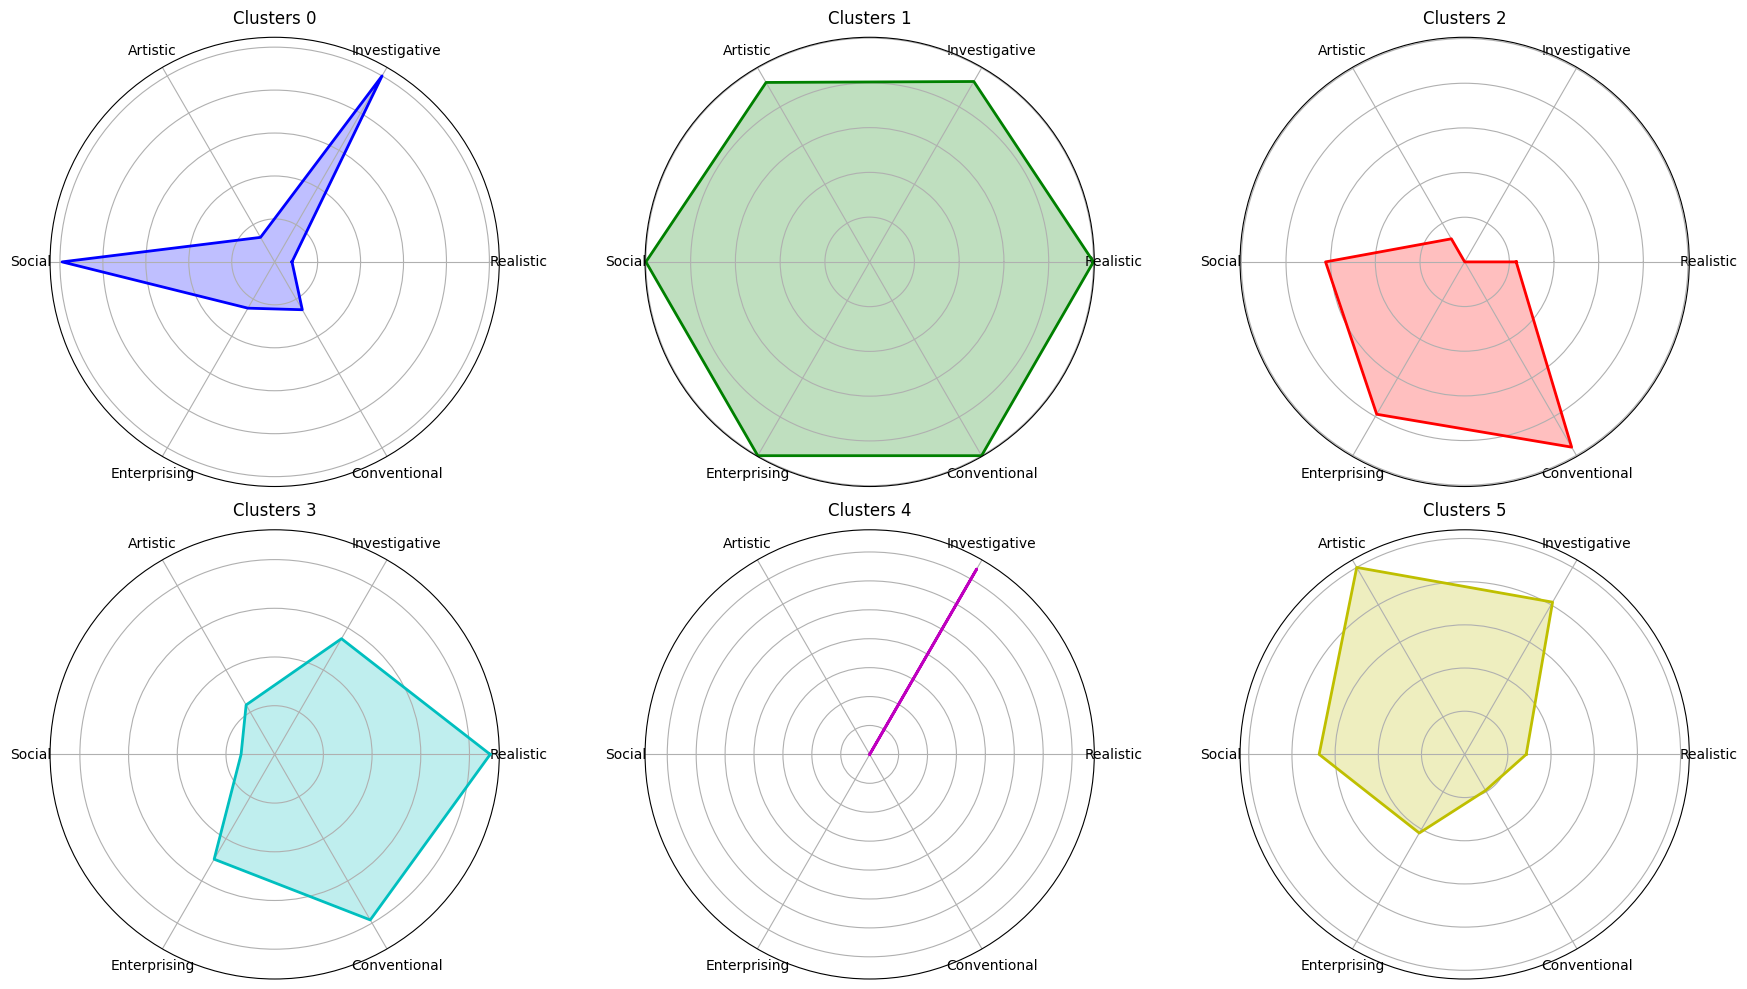

In [47]:
labels = ['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising', 'Conventional']

# เตรียมแกน
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# เตรียมกราฟ
fig, axes = plt.subplots(2, 3, figsize=(18, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()

colors = ['b', 'g', 'r', 'c', 'm', 'y']

# วาดแต่ละ Cluster
for idx, (cluster, values) in enumerate(data.items()):
    ax = axes[idx]
    cluster_values = values + values[:1]
    ax.plot(angles, cluster_values, color=colors[idx % len(colors)], linewidth=2)
    ax.fill(angles, cluster_values, color=colors[idx % len(colors)], alpha=0.25)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_yticklabels([])
    ax.set_title(f'{cluster}', size=12, pad=10)

plt.tight_layout()
plt.show()